<a href="https://colab.research.google.com/github/Siddharthg97/Covid-19-dashboard/blob/main/QR2001_OR2(3_to_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-I (QR2001)
#                                      Potential Reducion Method 

### Consider the problem:  Y = AX + q  where $$X\geq 0,Y\geq0, X^T Y =0$$
$$Step\space0 : s > 0,\space\space\space\space\space\epsilon > 0,\space\space\space\space\space \alpha\in(0,1),\space\space\space\space\space \bar{\beta} \in [0,1),\space\space\space\space\space\sigma>0,\space\space\space\space\space\rho\in (0,1)$$
$$Choose \space Z^0\space:=(X^0, Y^0)\space where, \space X^0, Y^0 \in R_+^n,\space\beta_0 \in [0,\bar{\beta}),\space k=0 $$

#### $$Step\space 1\space :\space Solve \space the \space system \space of \space Equations\space M(\Delta X) = \space N $$
$$ \begin{bmatrix}
Y^k & X^k \\
-A & I 
\end{bmatrix} 
%
\begin{bmatrix}
\Delta x^k \\
\Delta y^k 
\end{bmatrix} 
=
\begin{bmatrix}
- X^k Y + \beta \dfrac{(X^k)^T}{n} Ye \\
- Y^k + AX + q
\end{bmatrix} \space\space\space to\space obtain\space the\space d^k:= \space (\Delta X^k, \Delta Y^k), \space e\space is\space vector\space of\space \bar{1}$$

#### $$Step\space 2\space :\space Let \space l_k \space be \space the \space smallest\space non-negative\space integer-l,\space such\space that\space the\space following\space conditions\space holds: Z^k + \sigma \rho ^l d^k \in R_+^n \times R_+^n $$
$$\phi (Z^k + \sigma \rho ^l d^k) - \phi (Z^k) \leq \alpha \sigma \rho^l(1-\beta^k )s ,\space and\space Z:=(X,Y),\space s>0\\ $$
$$where, \space \phi (Z) = (n+s) \space \ln (X^T Y + ||Y - AX-q||_2^2 )- \sum_{n=1}^{n} \ln x_i y_i \\ $$
$$ Set,\space Z^{k+1} = Z^k + \sigma \rho ^l d^k \\ $$

#### $$Step\space 3\space :\space Termination \space Verification $$
$$ If\space  z_{k+1} \space satisfies : f(z^{k+1}) = (X^{k+1})^T(Y^{k+1}) + ||Y^{k+1} - AX^{k+1} - q||_2^2 < \epsilon$$
$$then\space  z_{k+1}\space  is\space  an\space  approximate  \space solution\space  of\space Y=AX+q, \space x,y\geq 0 ,\space X^T Y=0 \\ $$ 
$$ Else\space If\space  z_{k+1} \space - z_k < \epsilon \space \ln x_j^{k+1} y_j^{k+1} = 0 \space for \space some \space j, \space then \space z_{k+1} \space is\space  an\space  approximate  \space solution\space$$  
$$ Otherwise, \space pick \space any \space \beta_{k+1} \in [0,\bar{\beta }] \space and \space return \space to \space Step \space 1 \space with \space k=k+1 $$

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Exercise-3

In [ ]:
df=pd.read_csv("/content/Ex-(3-7).csv",header=None)
df2=df.iloc[:5,:]
df2

,0,1,2,3,4,5
0,0.0,-90.0,-80.0,-70.0,0.0,400.0
1,-90.0,-2.0,-2.0,-2.0,2.0,50.0
2,-70.0,-2.0,-1.0,-3.0,3.0,30.0
3,-50.0,-2.0,-3.0,-0.8,3.0,20.0
4,0.0,2.0,3.0,3.0,0.0,-10.0


# Initialization of Parameters

In [ ]:
a = np.array(df.iloc[:5,:5])
print("A: ",a,end="\n")
q = np.array(df.iloc[:5,5])
n = a.shape[0]

S = np.array([0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7])
s=round(random.choice(S),2)
epsilon = 10**-4
alpha,rho = 0.001,0.1

beta_bar = 0.03 
sigma = 50

z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.025
print("alpha =",alpha,", beta_bar =",beta_bar,",rho =",rho, 
      ", s=",s,", sigma=",sigma,", beta =",beta)
max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))

A:  [[  0.  -90.  -80.  -70.    0. ]
 [-90.   -2.   -2.   -2.    2. ]
 [-70.   -2.   -1.   -3.    3. ]
 [-50.   -2.   -3.   -0.8   3. ]
 [  0.    2.    3.    3.    0. ]]
alpha = 0.001 , beta_bar = 0.03 ,rho = 0.1 , s= 0.25 , sigma= 50 , beta = 0.025
Please provide the number of iterations after which x and y values are required :55


# Algorithm

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))
  

============================== 1 - epoch ==============================
f(z) 973222.5152742572
============================== 2 - epoch ==============================
f(z) 878336.5180868028
============================== 3 - epoch ==============================
f(z) 792701.875003524
============================== 4 - epoch ==============================
f(z) 715416.4626545351
============================== 5 - epoch ==============================
f(z) 645666.3257488091
============================== 6 - epoch ==============================
f(z) 582716.6276078833
============================== 7 - epoch ==============================
f(z) 145681.85927766704
============================== 8 - epoch ==============================
f(z) 36424.971704123054
============================== 9 - epoch ==============================
f(z) 9108.733952829076
============================== 10 - epoch ==============================
f(z) 2278.5337197660856
============================== 11 - epoch =====

# Results

X =  [0.24 0.   1.63 3.85 0.  ]
Y =  [ 0.   17.4   0.    0.    6.44]
Epochs :  55
f(z) values= [973222.5152742572, 878336.5180868028, 792701.875003524, 715416.4626545351, 645666.3257488091, 582716.6276078833, 145681.85927766704, 36424.971704123054, 9108.733952829076, 2278.5337197660856, 570.3849437253549, 142.9936049853815, 35.956800402103575, 9.097452664216062, 2.328974077698894, 0.6096010874791905, 0.1662476902487087, 0.04880017491023615, 0.015838448468029735, 0.005791396241819232, 0.002402865186985298, 0.0010789671327252354, 0.0005165393060001119, 0.0002534873373901043, 0.00012569675917245503, 6.293363552251526e-05, 3.197364715396374e-05, 1.6218679527206825e-05, 8.14902935865386e-06, 4.12106745172792e-06, 2.105953261832208e-06, 1.0726021441136018e-06, 5.420305162199936e-07, 2.7885761276505076e-07, 1.433888395720624e-07, 7.280656384827746e-08, 3.6874975704926137e-08, 1.8523068262613336e-08, 9.52841063174745e-09, 4.8817796625611516e-09, 2.491698926702053e-09, 1.2682205570967729e-09, 6

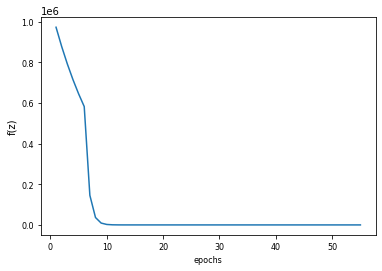

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-3.png",dpi=400)
plt.show()

# Exercise-4

In [ ]:
df2= df.iloc[6:11,:6]
df2


,0,1,2,3,4,5
6,0.0,0.0,0.0,1.0,2.0,-2.0
7,0.0,0.0,-1.0,-1.0,2.0,-1.0
8,0.0,-1.0,0.0,-1.0,1.0,7.0
9,1.0,-1.0,-1.0,0.0,0.0,2.0
10,2.0,1.0,0.0,0.0,0.0,-1.0


# Initialization of Parameters

In [ ]:
a = np.array(df.iloc[6:11,:5])
print("A: ",a,end="\n")
q = np.array(df.iloc[6:11,5])
n = a.shape[0]
s = 0.9
epsilon = 10**-4
alpha,rho = 0.0001,0.1 
#alpha = 0.2 # random.uniform(0,1)
beta_bar = 0.03 #random.uniform(0,0.5)   => beta_bar in [0,0.5)
sigma = 50
#rho = random.uniform(0,1)
z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.0005 #np.random.uniform(0,beta_bar)
print("alpha =",round(alpha,2),", beta_bar =",round(beta_bar,2),", rho =",round(rho,2), 
      " s=",s," sigma=",sigma," rho=",round(rho,2)," beta",round(beta,2))

max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))


A:  [[ 0.  0.  0.  1.  2.]
 [ 0.  0. -1. -1.  2.]
 [ 0. -1.  0. -1.  1.]
 [ 1. -1. -1.  0.  0.]
 [ 2.  1.  0.  0.  0.]]
alpha = 0.0 , beta_bar = 0.03 , rho = 0.1  s= 0.9  sigma= 50  rho= 0.1  beta 0.0
Please provide the number of iterations after which x and y values are required :55


# Algorithm

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))
  
    

============================== 1 - epoch ==============================
f(z) 172.26158714291185
============================== 2 - epoch ==============================
f(z) 156.29245216826135
============================== 3 - epoch ==============================
f(z) 141.92270221805305
============================== 4 - epoch ==============================
f(z) 128.94056336748406
============================== 5 - epoch ==============================
f(z) 117.20697809512339
============================== 6 - epoch ==============================
f(z) 30.4272190107617
============================== 7 - epoch ==============================
f(z) 27.710673079487215
============================== 8 - epoch ==============================
f(z) 25.247409174491036
============================== 9 - epoch ==============================
f(z) 23.014672605580188
============================== 10 - epoch ==============================
f(z) 20.98820911151813
============================== 11 - epoch 

# Results

X =  [0.06 1.98 0.03 1.15 0.58]
Y =  [0.19 0.1  3.99 0.16 1.89]
Epochs :  55
f(z) values= [172.26158714291185, 156.29245216826135, 141.92270221805305, 128.94056336748406, 117.20697809512339, 30.4272190107617, 27.710673079487215, 25.247409174491036, 23.014672605580188, 20.98820911151813, 19.14668328857419, 17.47482071712096, 15.956789074592537, 14.579257377551265, 13.328031022279283, 12.192425181048813, 11.15877940807199, 10.220740200139014, 9.363007038485913, 8.585658501091384, 7.875351451249342, 7.228024839918085, 6.637075690794546, 6.099790134716155, 5.608534085466577, 5.1608202355258115, 4.752625463228441, 4.378905903669361, 4.0348978376506786, 3.71862253011413, 3.715689345546158, 3.712739772247078, 3.7127105285876456, 3.7126813298014785, 3.712651815296975, 3.712648872074032, 3.712648580020921, 3.712648287751806, 3.7126479929912146, 3.7126479635984424, 3.712647960690875, 3.7126479577690623, 3.7126479548458287, 3.7126479519161046, 3.712647951624392, 3.7126479513309905, 3.712647951301

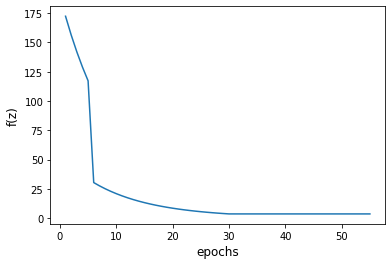

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-4.png",dpi=400)
plt.show()

# Exercise-5

In [ ]:
a = np.array(df.iloc[12:16,:4])
print(a)
q = np.array(df.iloc[12:16,4])


[[-1.  1.  1.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0. -1.]
 [ 1.  0. -1.  0.]]


# Initialization of Parameters

In [ ]:
a = np.array(df.iloc[12:16,:4])
print(a)
q = np.array(df.iloc[12:16,4])
n = a.shape[0]
s = 0.9
epsilon = 10**-4
alpha,rho = 0.001,0.1 
#alpha = 0.2 # random.uniform(0,1)
beta_bar = 0.03 #random.uniform(0,0.5)   => beta_bar in [0,0.5)
sigma = 50
#rho = random.uniform(0,1)
z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.0005 #np.random.uniform(0,beta_bar)
print("alpha =",round(alpha,2),", beta_bar =",round(beta_bar,2),", rho =",round(rho,2), 
      " s=",s," sigma=",sigma," rho=",round(rho,2)," beta",round(beta,2))



max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))

[[-1.  1.  1.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0. -1.]
 [ 1.  0. -1.  0.]]
alpha = 0.0 , beta_bar = 0.03 , rho = 0.1  s= 0.9  sigma= 50  rho= 0.1  beta 0.0
Please provide the number of iterations after which x and y values are required :55


# Algorithm

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))

============================== 1 - epoch ==============================
f(z) 44.46696524567913
============================== 2 - epoch ==============================
f(z) 17.63507431199999
============================== 3 - epoch ==============================
f(z) 8.087769121606762
============================== 4 - epoch ==============================
f(z) 4.045689932048321
============================== 5 - epoch ==============================
f(z) 2.165636490903386
============================== 6 - epoch ==============================
f(z) 1.197102694174683
============================== 7 - epoch ==============================
f(z) 0.6589625962772792
============================== 8 - epoch ==============================
f(z) 0.3650156331926325
============================== 9 - epoch ==============================
f(z) 0.20098649422211828
============================== 10 - epoch ==============================
f(z) 0.11290281956411188
============================== 11 - epoch =

X =  [1. 0. 2. 0.]
Y =  [0. 2. 0. 0.]
Epochs :  55
f(z) values= [44.46696524567913, 17.63507431199999, 8.087769121606762, 4.045689932048321, 2.165636490903386, 1.197102694174683, 0.6589625962772792, 0.3650156331926325, 0.20098649422211828, 0.11290281956411188, 0.06250418999219526, 0.034188344326656885, 0.018778815614628568, 0.010419813746372941, 0.005750117947081016, 0.0031642897955387237, 0.0017492978188269927, 0.0009814528780117454, 0.000551259809267634, 0.0003055185827319314, 0.00017107826778397231, 9.502560355665088e-05, 5.241700709494326e-05, 2.909528097627075e-05, 1.6466514091200668e-05, 9.10778056377596e-06, 5.108460197111869e-06, 2.8834134433546315e-06, 1.6133995875446724e-06, 8.939032721919909e-07, 5.053127880271972e-07, 2.8570590422066e-07, 1.604332828134994e-07, 9.040640609230932e-08, 5.076141777702285e-08, 2.8475739811026046e-08, 1.6122096201480105e-08, 9.124078331668973e-09, 5.183867590205398e-09, 2.9061834586367167e-09, 1.618969132295209e-09, 9.14152643782885e-10, 5.16651

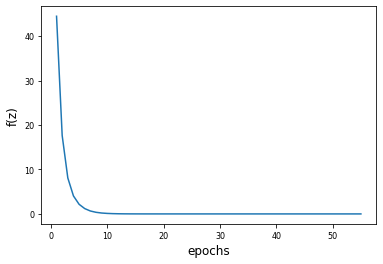

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-5.png",dpi=400)
plt.show()

# Exercise-6

In [ ]:
a = np.array(df.iloc[17:20,:3])
print(a,end="\n\n")
q = np.array(df.iloc[17:20,3])
print(q)

[[ 1. -2.  0.]
 [ 0.  1. -2.]
 [-2.  0.  1.]]

[-1.  1.  7.]


# Initialization of Parameters

In [ ]:
a = np.array(df.iloc[17:20,:3])
print(a)
q = np.array(df.iloc[17:20,3])
n = a.shape[0]
s = 0.9
epsilon = 10**-4
alpha,rho = 0.001,0.1 
#alpha = 0.2 # random.uniform(0,1)
beta_bar = 0.03 #random.uniform(0,0.5)   => beta_bar in [0,0.5)
sigma = 50
#rho = random.uniform(0,1)
z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.0005 #np.random.uniform(0,beta_bar)
print("alpha =",round(alpha,2),", beta_bar =",round(beta_bar,2),", rho =",round(rho,2), 
      " s=",s," sigma=",sigma," rho=",round(rho,2)," beta",round(beta,2))




max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))



[[ 1. -2.  0.]
 [ 0.  1. -2.]
 [-2.  0.  1.]]
alpha = 0.0 , beta_bar = 0.03 , rho = 0.1  s= 0.9  sigma= 50  rho= 0.1  beta 0.0
Please provide the number of iterations after which x and y values are required :55


# Algorithm

In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))

============================== 1 - epoch ==============================
f(z) 494.06012222124775
============================== 2 - epoch ==============================
f(z) 449.6679028802888
============================== 3 - epoch ==============================
f(z) 409.3187889199602
============================== 4 - epoch ==============================
f(z) 372.043196593868
============================== 5 - epoch ==============================
f(z) 368.635995573311
============================== 6 - epoch ==============================
f(z) 368.2981839957025
============================== 7 - epoch ==============================
f(z) 367.94240478333654
============================== 8 - epoch ==============================
f(z) 367.60553098134966
============================== 9 - epoch ==============================
f(z) 367.25324391807794
============================== 10 - epoch ==============================
f(z) 366.91617189588555
============================== 11 - epoch ====

X =  [2.96 7.98 3.27]
Y =  [2.98 5.66 4.36]
Epochs :  55
f(z) values= [494.06012222124775, 449.6679028802888, 409.3187889199602, 372.043196593868, 368.635995573311, 368.2981839957025, 367.94240478333654, 367.60553098134966, 367.25324391807794, 366.91617189588555, 366.8822368230585, 366.8818962137235, 366.8818621298467, 366.88185873791736, 366.88185870222213, 366.88185834149226, 366.8818547682829, 366.88181868709694, 366.8814630676601, 366.88112758099226, 366.880780238692, 366.88044008739473, 366.88040507469674, 366.8803712965995, 366.880367786931, 366.88036441448105, 366.880364073472, 366.88036403957125, 366.880364039225, 366.8803640388833, 366.88036403884973, 366.88036403881426, 366.8803640387808, 366.8803640387448, 366.88036403838726, 366.88036403478986, 366.8803639991646, 366.88036363441614, 366.8803601100348, 366.8803567439752, 366.8803564080047, 366.8803560556934, 366.88035571908415, 366.8803556854307, 366.8803556490453, 366.88035529677387, 366.880354960291, 366.8803549265306, 366

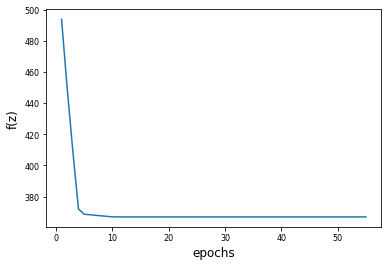

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-6.png",dpi=400)
plt.show()

# Exercise-7

In [ ]:
a = np.array(df.iloc[21:24,:3])
print(a,end="\n\n")
q = np.array(df.iloc[21:24,3])
print(q)

[[-1.    2.    1.  ]
 [ 1.   -0.5  -0.25]
 [-0.5  -1.   -1.  ]]

[-0.25 -0.1   3.  ]


# Initialization of Parameters

In [ ]:

a = np.array(df.iloc[21:24,:3])
print(a)
q = np.array(df.iloc[21:24,3])
n = a.shape[0]
s = 0.9
epsilon = 10**-4
alpha,rho = 0.001,0.1 
#alpha = 0.2 # random.uniform(0,1)
beta_bar = 0.03 #random.uniform(0,0.5)   => beta_bar in [0,0.5)
sigma = 50
#rho = random.uniform(0,1)
z = np.random.randint(1,10,2*n)
e = np.ones(n)
beta = 0.0005 #np.random.uniform(0,beta_bar)
print("alpha =",round(alpha,2),", beta_bar =",round(beta_bar,2),", rho =",round(rho,2), 
      " s=",s," sigma=",sigma," rho=",round(rho,2)," beta",round(beta,2))

max_iter=int(input("Please provide the number of iterations after which x and y values are required :"))


[[-1.    2.    1.  ]
 [ 1.   -0.5  -0.25]
 [-0.5  -1.   -1.  ]]
alpha = 0.0 , beta_bar = 0.03 , rho = 0.1  s= 0.9  sigma= 50  rho= 0.1  beta 0.0
Please provide the number of iterations after which x and y values are required :45


In [ ]:
#---------------------------------------------------------------------------------------------------------
# Step1
#---------------------------------------------------------------------------------------------------------

#Func to find Phi(z)
def phi(z):
    x = z[:n]
    y = z[n:]
    return ((n+s)*np.log(np.dot(x,y) + (np.linalg.norm(y - np.dot(a,x) - q))**2)) - sum(np.log(np.multiply(x,y)))

#Func to terminate 
def f(z):
  x = z[:n]
  y = z[n:]
  return np.dot(x,y) + pow(np.linalg.norm(y - np.dot(a,x) - q),2)

k=0
list1=[]
for i in range (max_iter): 
  k=k+1
  print("="*30,k,"- epoch","="*30)
    
  #Solving Linear Equation A (Delta X) = B
  A = np.vstack((np.hstack((np.diag(z[n:]), np.diag(z[:n]))),np.hstack((-a, np.eye(n)))))
  B = np.vstack((((-1)*np.dot(np.diag(z[:n]),z[n:]) + (beta*np.dot(z[:n],z[n:]))/n*e).reshape(n,1),(-z[n:]+np.dot(a,z[:n])+q).reshape(n,1)))
  delta_X = np.linalg.solve(A, B)

  #---------------------------------------------------------------------------------------------------------
  # Step2
  #---------------------------------------------------------------------------------------------------------
  
  #Finding l = smallest non-negative integer then find z^{k+1}  
  l = 0
  while True:
    threshold = (-1)* alpha*sigma*(1-beta)*s*rho**l
    z_new = z + sigma*(rho**l)*delta_X.ravel()
    
    # If any element in X and Y are non-positive then phi(z) not calculated, proceed to next iteration
    # If all elements in X and Y are positive (>0) then only phi(z) should be calculated 
    if (z_new>0).all() and phi(z_new)- phi(z) <= threshold :
        z = z_new
        break
    else:
      l=l+1
  #print("l = ",l)
  
  #---------------------------------------------------------------------------------------------------------
  # Step 3
  #---------------------------------------------------------------------------------------------------------
  #if (f(z)  < epsilon) and round(np.dot(z[:n],z[n:]),4)==0:
   # print(f(z),np.round(z[:n],2),np.round(z[n:],2))
    #break
  #elif (np.linalg.norm(z_new - z) <epsilon) and (np.multiply(z_new[:n],z_new[n:])==1).any() :
   # print(z_new[:n],z_new[n:])
    #break
  #else:
   # print(f(z) ,epsilon)
    #print(" beta=",round(beta,2),"X=",x,"Y=",y, "-",l,"==",np.dot(x_new,y_new) + np.linalg.norm(y_new - np.dot(a,x_new) - q)**2)
        
    #Updating beta, X, Y for next Iteration
  beta = np.random.uniform(0,beta_bar)
  print("f(z)",f(z))
  list1.append(f(z))

============================== 1 - epoch ==============================
f(z) 140.208373466164
============================== 2 - epoch ==============================
f(z) 128.54477693022525
============================== 3 - epoch ==============================
f(z) 117.92672546080186
============================== 4 - epoch ==============================
f(z) 108.25590678608867
============================== 5 - epoch ==============================
f(z) 99.4327495707261
============================== 6 - epoch ==============================
f(z) 91.40517423611368
============================== 7 - epoch ==============================
f(z) 84.06350392095882
============================== 8 - epoch ==============================
f(z) 77.36146826986713
============================== 9 - epoch ==============================
f(z) 71.1866483081057
============================== 10 - epoch ==============================
f(z) 65.06078785167422
============================== 11 - epoch =======

X =  [3.16 2.82 2.49]
Y =  [5.87 0.31 1.25]
Epochs :  45
f(z) values= [140.208373466164, 128.54477693022525, 117.92672546080186, 108.25590678608867, 99.4327495707261, 91.40517423611368, 84.06350392095882, 77.36146826986713, 71.1866483081057, 65.06078785167422, 59.95101581730886, 55.024970321592505, 50.705040025555405, 50.70085350359866, 50.696831967947254, 50.696390580215564, 50.692165475837314, 50.688161869016554, 50.68775899418455, 50.687758582007795, 50.68775816773336, 50.68775776004976, 50.687757315433814, 50.68775311859449, 50.68774910441676, 50.68774910035046, 50.68774909587465, 50.687749054013196, 50.687749013835365, 50.68774901379505, 50.687749013794615, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225, 50.687749013794225]


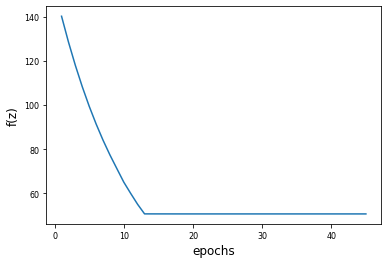

In [ ]:
print("X = ",np.round(z[:n],2))
print("Y = ",np.round(z[n:],2))
print("Epochs : ",k)
print("f(z) values=",list1)

x=range(1,len(list1)+1)
fig,ax=plt.subplots()
plt.plot(x,list1)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.xlabel("epochs",fontsize="12")
plt.ylabel("f(z)",fontsize="12")
plt.savefig("Exercise-7.png",dpi=400)
plt.show()